In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Reading the data into a dataframe
data= pd.read_csv("C:/Users/HP/Downloads/Customer Segmentation.csv/Customer Segmentation.csv")

In [3]:
#checking the data
data.head()

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-17.473886,24.295514,...,90004,Crossing,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,129.60.144.253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-4.838304,-80.648215,...,9,Center,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,100.2.67.41
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-6.424052,-79.242648,...,5104,Point,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,48.161.197.47
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,CN,36.759507,110.632006,...,8,Center,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,36.188.226.116
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,TH,17.074088,104.449040,...,994,Trail,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,181.24.84.57


In [4]:
#checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_name      51000 non-null  object 
 1   last_name       51000 non-null  object 
 2   title           51000 non-null  object 
 3   gender          51000 non-null  object 
 4   email           51000 non-null  object 
 5   city            51000 non-null  object 
 6   country         51000 non-null  object 
 7   country_code    50966 non-null  object 
 8   latitude        51000 non-null  float64
 9   longitude       51000 non-null  float64
 10  phone           51000 non-null  object 
 11  street_address  51000 non-null  object 
 12  street_name     51000 non-null  object 
 13  street_number   51000 non-null  int64  
 14  street_suffix   51000 non-null  object 
 15  time_zone       51000 non-null  object 
 16  company_name    51000 non-null  object 
 17  department      51000 non-null 

In [5]:
#dropping irrelevant columns
data.drop(columns=["title", "street_name", "street_number", "street_suffix", "street_address", "ip_address","phone", "country_code", "latitude", "longitude"], inplace= True)

In [6]:
#checking new dataframe
data.head()

,first_name,last_name,gender,email,city,country,time_zone,company_name,department,job_title,language,university,linkedin_skill
0,Priscella,Pollett,Agender,ppollett0@foxnews.com,Sesheke,Zambia,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle
1,Ana,Onge,Male,aonge1@fda.gov,Querecotillo,Peru,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry
2,Butch,Rawls,Male,brawls2@slideshare.net,Licupis,Peru,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN
3,Ambros,Fairrie,Male,afairrie3@reuters.com,Yonghe,China,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication
4,Gaylene,Titcomb,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL


In [7]:
#checking dtypes of data
print(data.dtypes)

first_name        object
last_name         object
gender            object
email             object
city              object
country           object
time_zone         object
company_name      object
department        object
job_title         object
language          object
university        object
linkedin_skill    object
dtype: object


In [8]:
#checking for missing values
data.isnull().sum()

first_name        0
last_name         0
gender            0
email             0
city              0
country           0
time_zone         0
company_name      0
department        0
job_title         0
language          0
university        0
linkedin_skill    0
dtype: int64

In [9]:
#checking the for unique observations in gender column
data["gender"].unique()

array(['Agender', 'Male', 'Female', 'Non-binary', 'Polygender',
       'Genderqueer', 'Genderfluid', 'Bigender'], dtype=object)

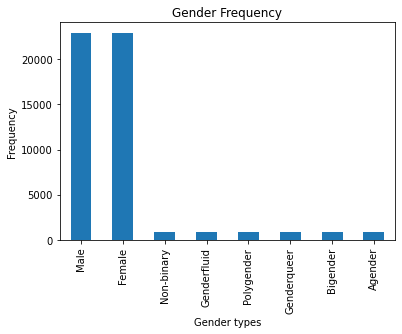

In [10]:
#visualizing the gender column
gender_value= data["gender"].value_counts()
gender_value.plot(kind="bar"),
plt.xlabel("Gender types"),
plt.ylabel("Frequency"),
plt.title("Gender Frequency");

In [11]:
#checking the for unique observations in gender column
data["department"].unique()

array(['Support', 'Sales', 'Engineering', 'Marketing', 'Human Resources',
       'Accounting', 'Services', 'Business Development',
       'Product Management', 'Legal', 'Research and Development',
       'Training'], dtype=object)

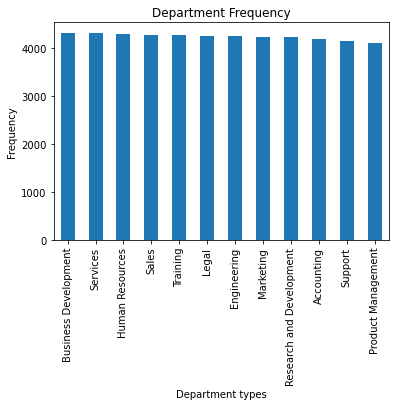

In [12]:
#visualizing the department column
department_value= data["department"].value_counts()
department_value.plot(kind="bar"),
plt.xlabel("Department types"),
plt.ylabel("Frequency"),
plt.title("Department Frequency");

In [13]:
#checking for unique obsevations in each column
data.nunique()

first_name         8416
last_name         31257
gender                8
email             51000
city              24921
country             235
time_zone           330
company_name        383
department           12
job_title           195
language             97
university         6633
linkedin_skill     5976
dtype: int64

In [14]:
 # spliting time_zone into continent and time_zone.
s = data['time_zone'].str.split('/')
data = data.assign(continent=s.str[0], timezone=s.str[1])

In [15]:
data.head()

,first_name,last_name,gender,email,city,country,time_zone,company_name,department,job_title,language,university,linkedin_skill,continent,timezone
0,Priscella,Pollett,Agender,ppollett0@foxnews.com,Sesheke,Zambia,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,Africa,Lusaka
1,Ana,Onge,Male,aonge1@fda.gov,Querecotillo,Peru,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,America,Lima
2,Butch,Rawls,Male,brawls2@slideshare.net,Licupis,Peru,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,America,Lima
3,Ambros,Fairrie,Male,afairrie3@reuters.com,Yonghe,China,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,Asia,Harbin
4,Gaylene,Titcomb,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,Asia,Bangkok


In [16]:
#checking the continent data
data["continent"].unique()

array(['Africa', 'America', 'Asia', 'Europe', 'Pacific', 'Indian',
       'Australia', 'Atlantic', 'Arctic'], dtype=object)

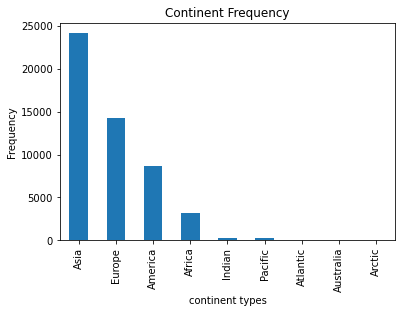

In [17]:
#Visualizing the continent data
continent_value= data["continent"].value_counts()
continent_value.plot(kind="bar"),
plt.xlabel("continent types"),
plt.ylabel("Frequency"),
plt.title("Continent Frequency");

In [18]:

pip install squarify

Note: you may need to restart the kernel to use updated packages.


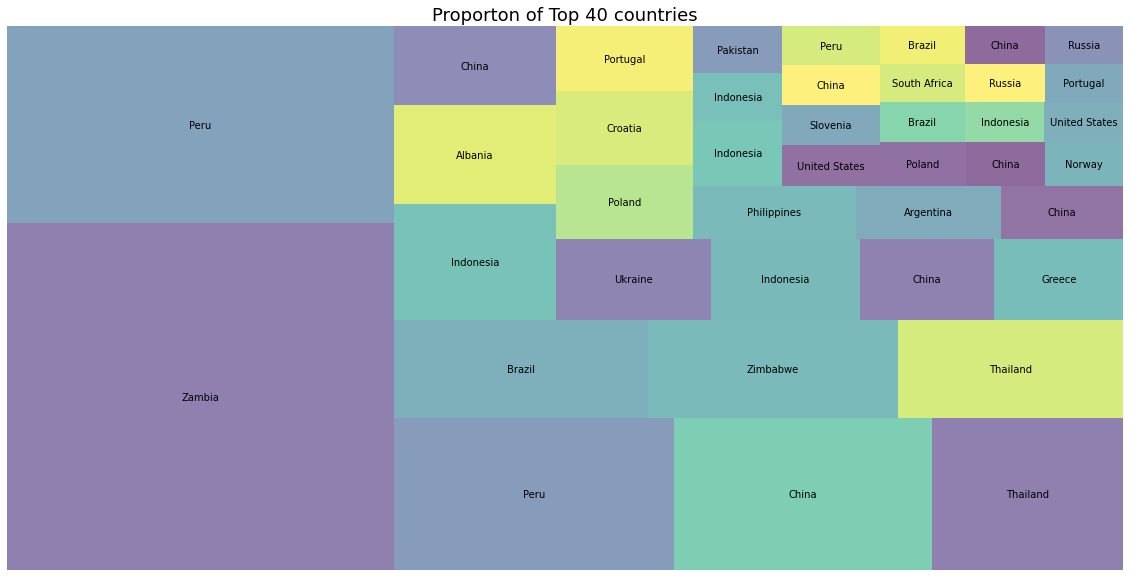

In [19]:
#Visualing the countries as represented in the datasets
import squarify 
plt.figure(figsize=(20, 10))
sizes = data['country'].value_counts()[:40]
squarify.plot(sizes=sizes, label=data['country'], alpha=0.6)
plt.title('Proporton of Top 40 countries', fontsize=18)
plt.axis('off')
plt.show()

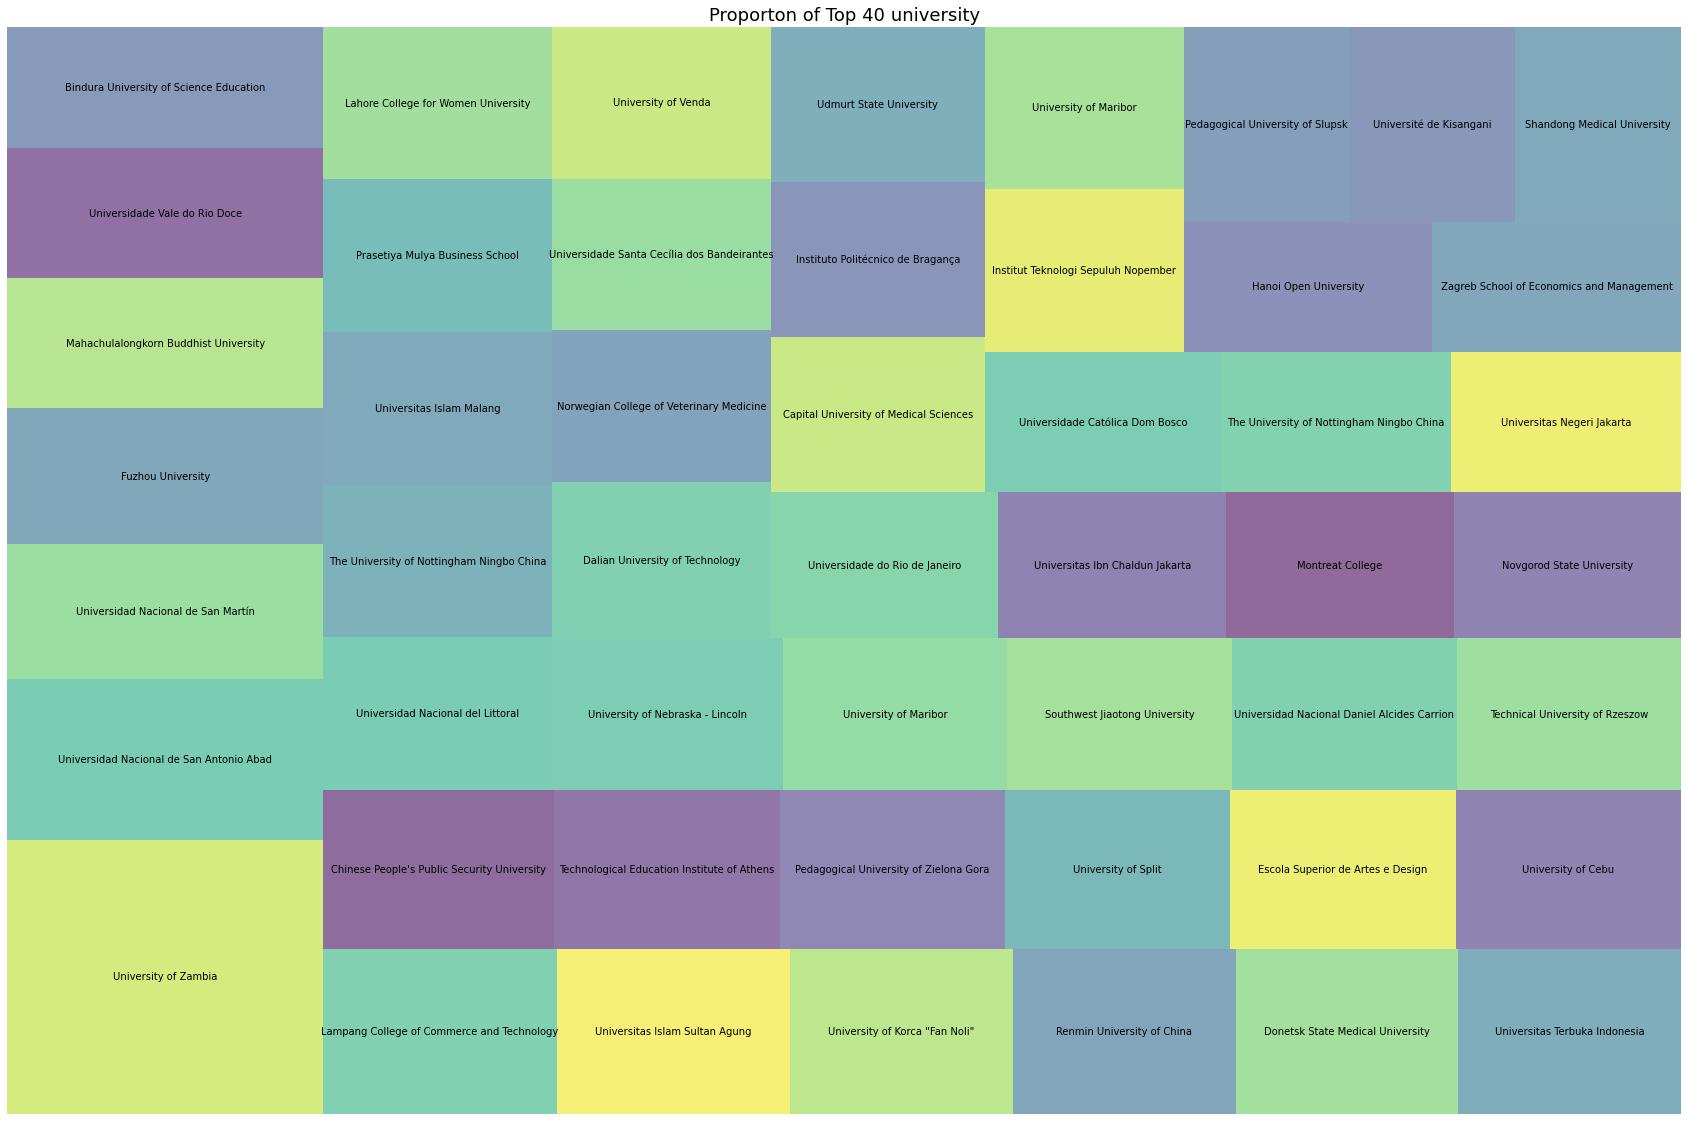

In [20]:
#visualizing the top universities
plt.figure(figsize=(30, 20))
sizes = data['university'].value_counts()[:50]
squarify.plot(sizes=sizes, label=data['university'], alpha=0.6)
plt.title('Proporton of Top 40 university', fontsize=18)
plt.axis('off')
plt.show()

In [21]:
#grouping continent by their job
data.groupby('continent')['job_title'].count

<bound method GroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000020130231C70>>

In [22]:
"""let us take a look at Africa"""

'let us take a look at Africa'

In [23]:
Africa = data[data.continent == 'Africa']

In [24]:
#checking the Africa data
Africa.head()

,first_name,last_name,gender,email,city,country,time_zone,company_name,department,job_title,language,university,linkedin_skill,continent,timezone
0,Priscella,Pollett,Agender,ppollett0@foxnews.com,Sesheke,Zambia,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,Africa,Lusaka
6,Fredric,Gascard,Female,fgascard6@bbb.org,Filabusi,Zimbabwe,Africa/Harare,Jabbersphere,Marketing,Geologist II,Dzongkha,Bindura University of Science Education,Eagle PCB,Africa,Harare
32,Bertie,Stooke,Female,bstookew@etsy.com,Dordrecht,South Africa,Africa/Johannesburg,Chatterpoint,Marketing,Food Chemist,Swahili,University of Venda,vBlock,Africa,Johannesburg
48,Godfry,Bleas,Polygender,gbleas1c@wisc.edu,Kinshasa,Democratic Republic of the Congo,Africa/Kinshasa,Roodel,Training,Web Developer IV,Lao,Université de Kisangani,Turbo C++,Africa,Kinshasa
51,Rochette,Hughs,Male,rhughs1f@jiathis.com,Otse,Botswana,Africa/Gaborone,Edgeify,Legal,Nurse Practicioner,Estonian,Botswana College of Agriculture,Ambulance,Africa,Gaborone


In [25]:
#checking for unique values
Africa.nunique()

first_name        2628
last_name         3095
gender               8
email             3197
city              1791
country             52
time_zone           52
company_name       383
department          12
job_title          195
language            97
university         595
linkedin_skill    2470
continent            1
timezone            52
dtype: int64

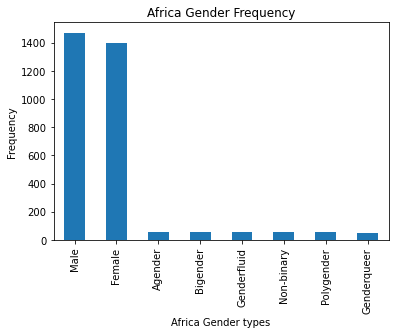

In [26]:
#visualizing the genders in Africa
Africa_gender_value= Africa["gender"].value_counts()
Africa_gender_value.plot(kind="bar"),
plt.xlabel("Africa Gender types"),
plt.ylabel("Frequency"),
plt.title("Africa Gender Frequency");

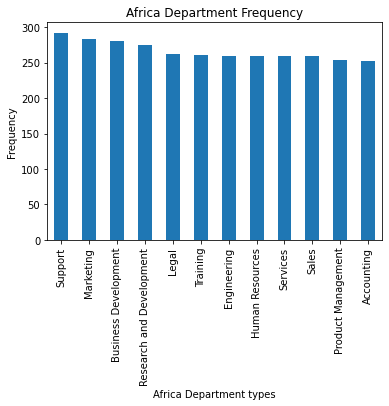

In [27]:
#visualizing the departments in Africa datset
Africa_department_value= Africa["department"].value_counts()
Africa_department_value.plot(kind="bar"),
plt.xlabel("Africa Department types"),
plt.ylabel("Frequency"),
plt.title("Africa Department Frequency");

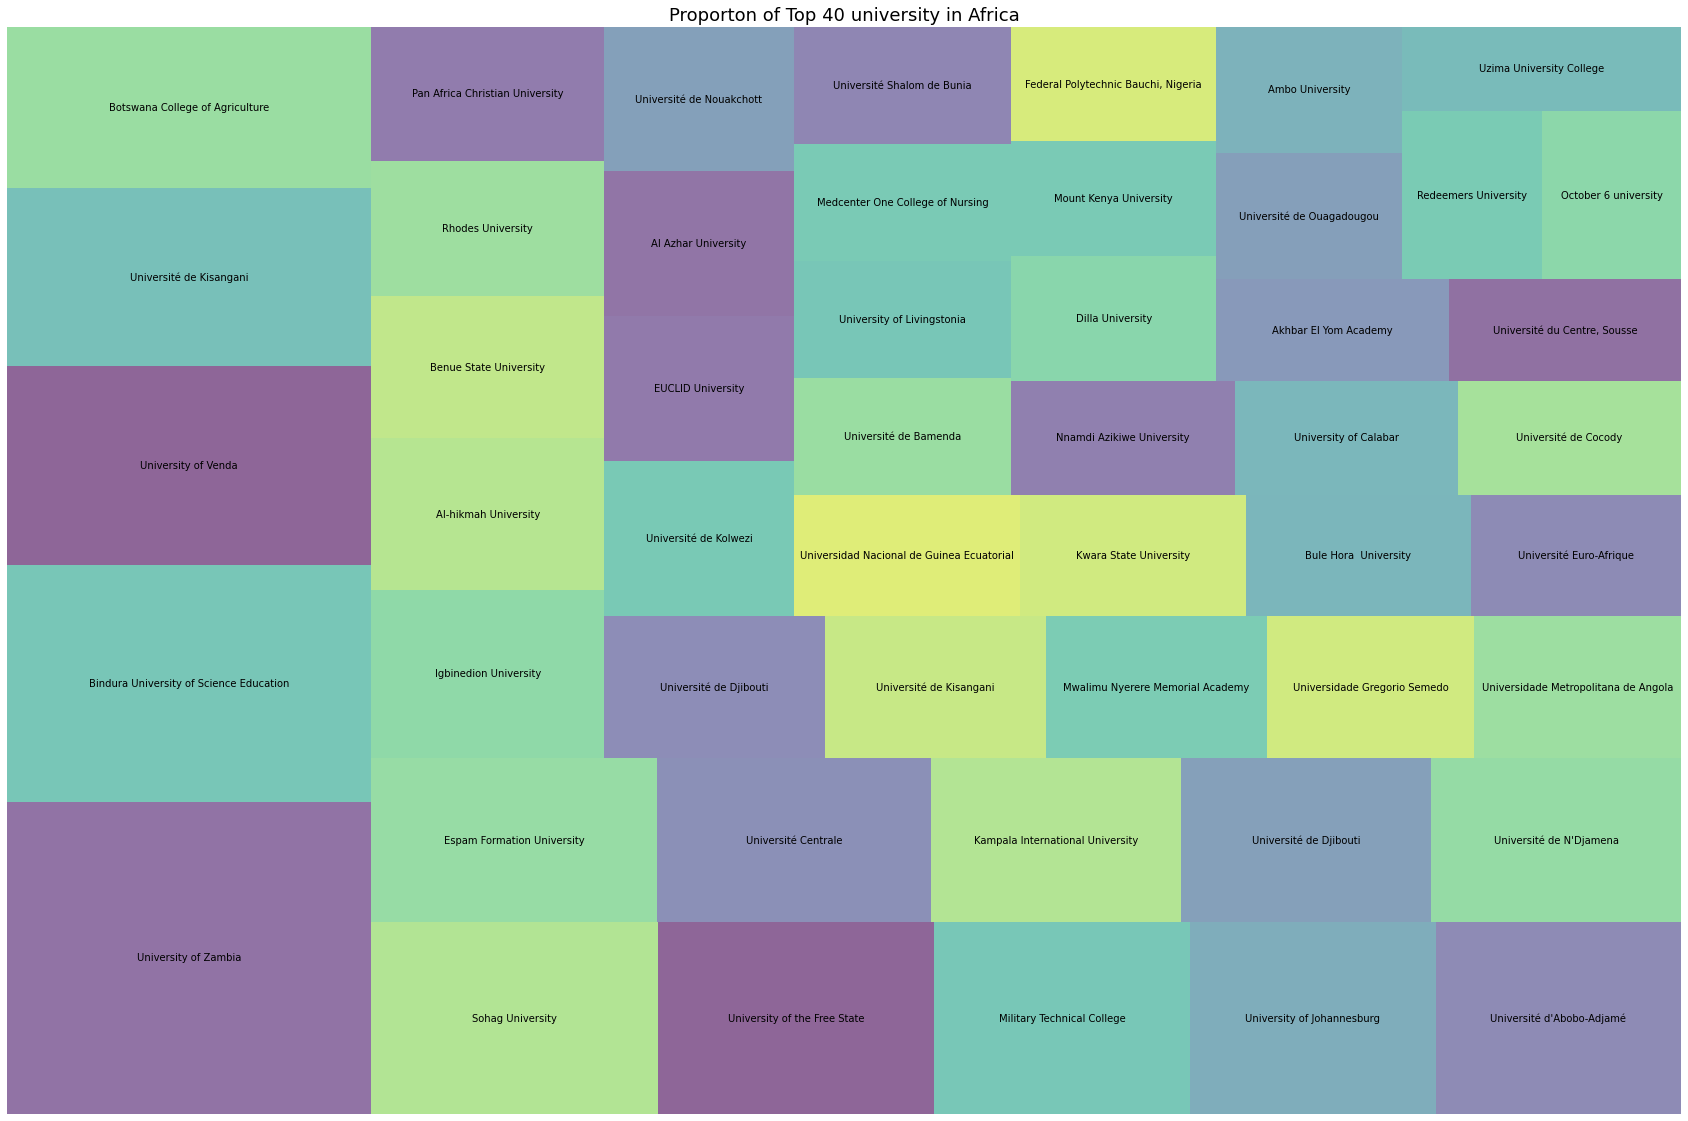

In [28]:
#Visualizing the top universities in Africa
plt.figure(figsize=(30, 20))
sizes = Africa['university'].value_counts()[:50]
squarify.plot(sizes=sizes, label=Africa['university'], alpha=0.6)
plt.title('Proporton of Top 40 university in Africa', fontsize=18)
plt.axis('off')
plt.show()

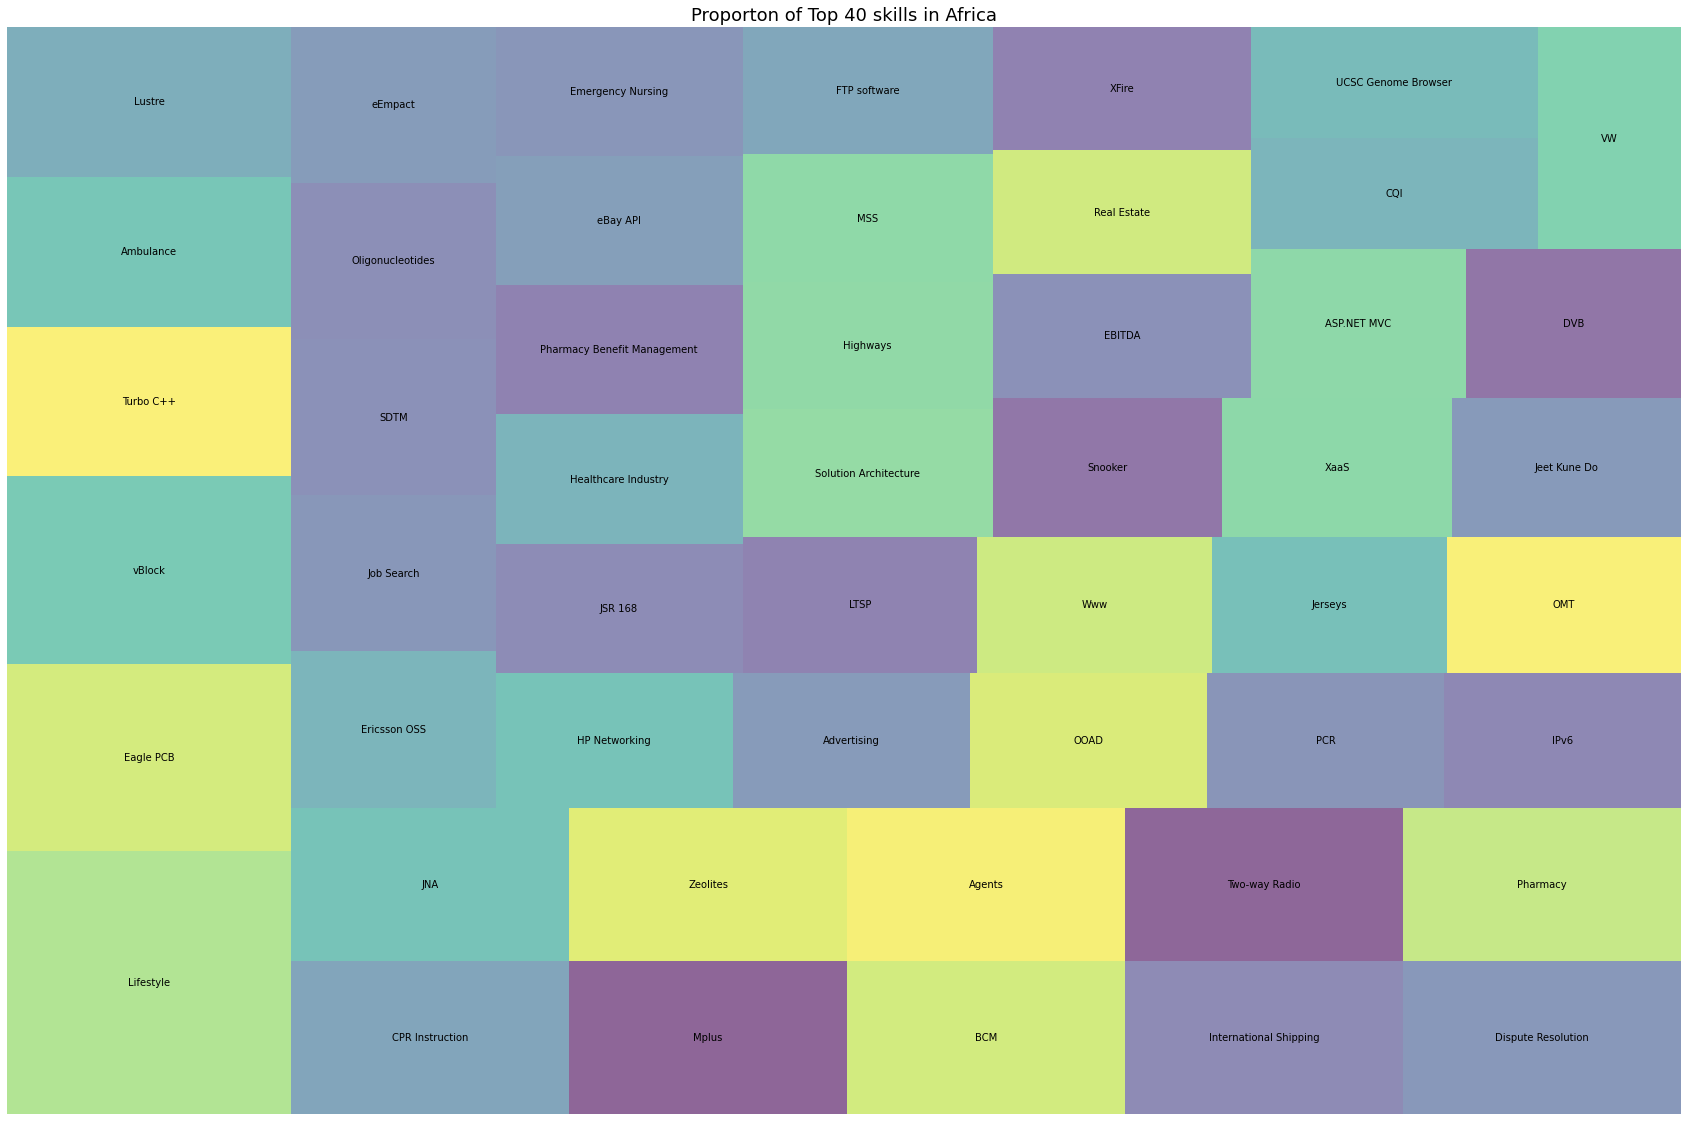

In [29]:
#Visualizing the top skills in Africa
plt.figure(figsize=(30, 20))
sizes = Africa['linkedin_skill'].value_counts()[:50]
squarify.plot(sizes=sizes, label=Africa['linkedin_skill'], alpha=0.6)
plt.title('Proporton of Top 40 skills in Africa', fontsize=18)
plt.axis('off')
plt.show()

Text(0, 0.5, 'CITIES')

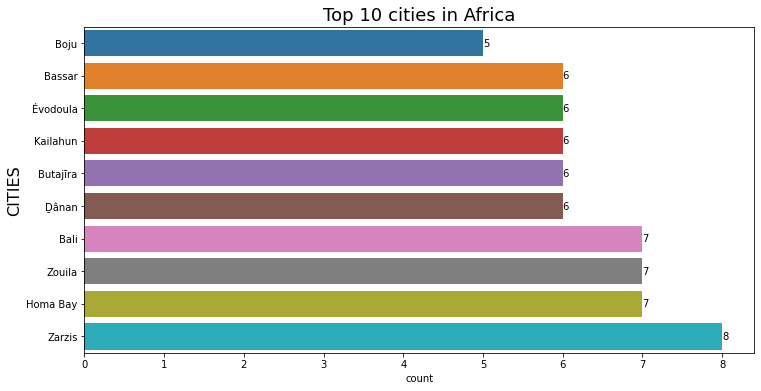

In [30]:
#Visualizing the top cities in Africa
plt.figure(figsize=(12, 6))
Africa_city = Africa['city']
ax=sns.countplot(y=Africa_city ,data =Africa,orient='h',order=Africa_city.value_counts().sort_values().tail(10).index)
plt.title('Top 10 cities in Africa', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('CITIES', fontsize=16)

In [31]:
"""Taking a look at Nigeria"""

'Taking a look at Nigeria'

In [32]:
Nigeria = data[data.country == 'Nigeria']

In [33]:
#checking the data
Nigeria.head()

,first_name,last_name,gender,email,city,country,time_zone,company_name,department,job_title,language,university,linkedin_skill,continent,timezone
282,Petunia,Cabena,Female,pcabena7u@51.la,Okpoga,Nigeria,Africa/Lagos,Thoughtstorm,Accounting,Mechanical Systems Engineer,English,Igbinedion University,Pharmacy,Africa,Lagos
284,Kermie,Clewett,Female,kclewett7w@sphinn.com,Boju,Nigeria,Africa/Lagos,Mybuzz,Support,Account Executive,Croatian,Al-hikmah University,Ericsson OSS,Africa,Lagos
307,Nikolaos,Illing,Female,nilling8j@bloglines.com,Musawa,Nigeria,Africa/Lagos,Linkbuzz,Support,Staff Accountant I,Hungarian,Benue State University,Job Search,Africa,Lagos
544,Eberto,Aspey,Male,easpeyf4@github.io,Mutum Biyu,Nigeria,Africa/Lagos,Devpoint,Product Management,Occupational Therapist,Japanese,Kwara State University,Emergency Nursing,Africa,Lagos
618,Hilde,Bruinemann,Male,hbruinemannh6@jalbum.net,Lagos,Nigeria,Africa/Lagos,Devpulse,Training,Tax Accountant,Chinese,Nnamdi Azikiwe University,MSS,Africa,Lagos


In [34]:
#checking for unique values in Nigeria dataset
Nigeria.nunique()

first_name        439
last_name         451
gender              8
email             452
city              251
country             1
time_zone           3
company_name      266
department         12
job_title         153
language           96
university        114
linkedin_skill    441
continent           1
timezone            3
dtype: int64

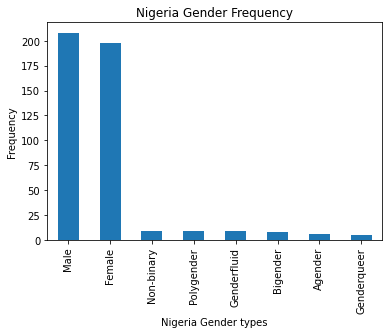

In [35]:
#visualizing the genders in Nigeria
Nigeria_gender_value= Nigeria["gender"].value_counts()
Nigeria_gender_value.plot(kind="bar"),
plt.xlabel("Nigeria Gender types"),
plt.ylabel("Frequency"),
plt.title("Nigeria Gender Frequency");

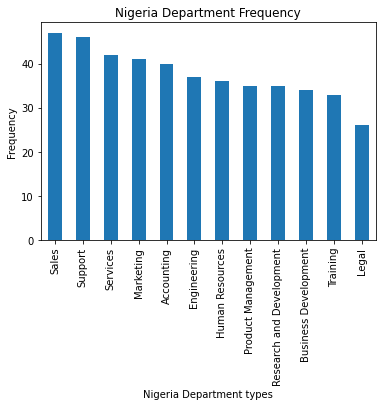

In [36]:
#visualizing the departments in Nigeria datset
Nigeria_department_value= Nigeria["department"].value_counts()
Nigeria_department_value.plot(kind="bar"),
plt.xlabel("Nigeria Department types"),
plt.ylabel("Frequency"),
plt.title("Nigeria Department Frequency");

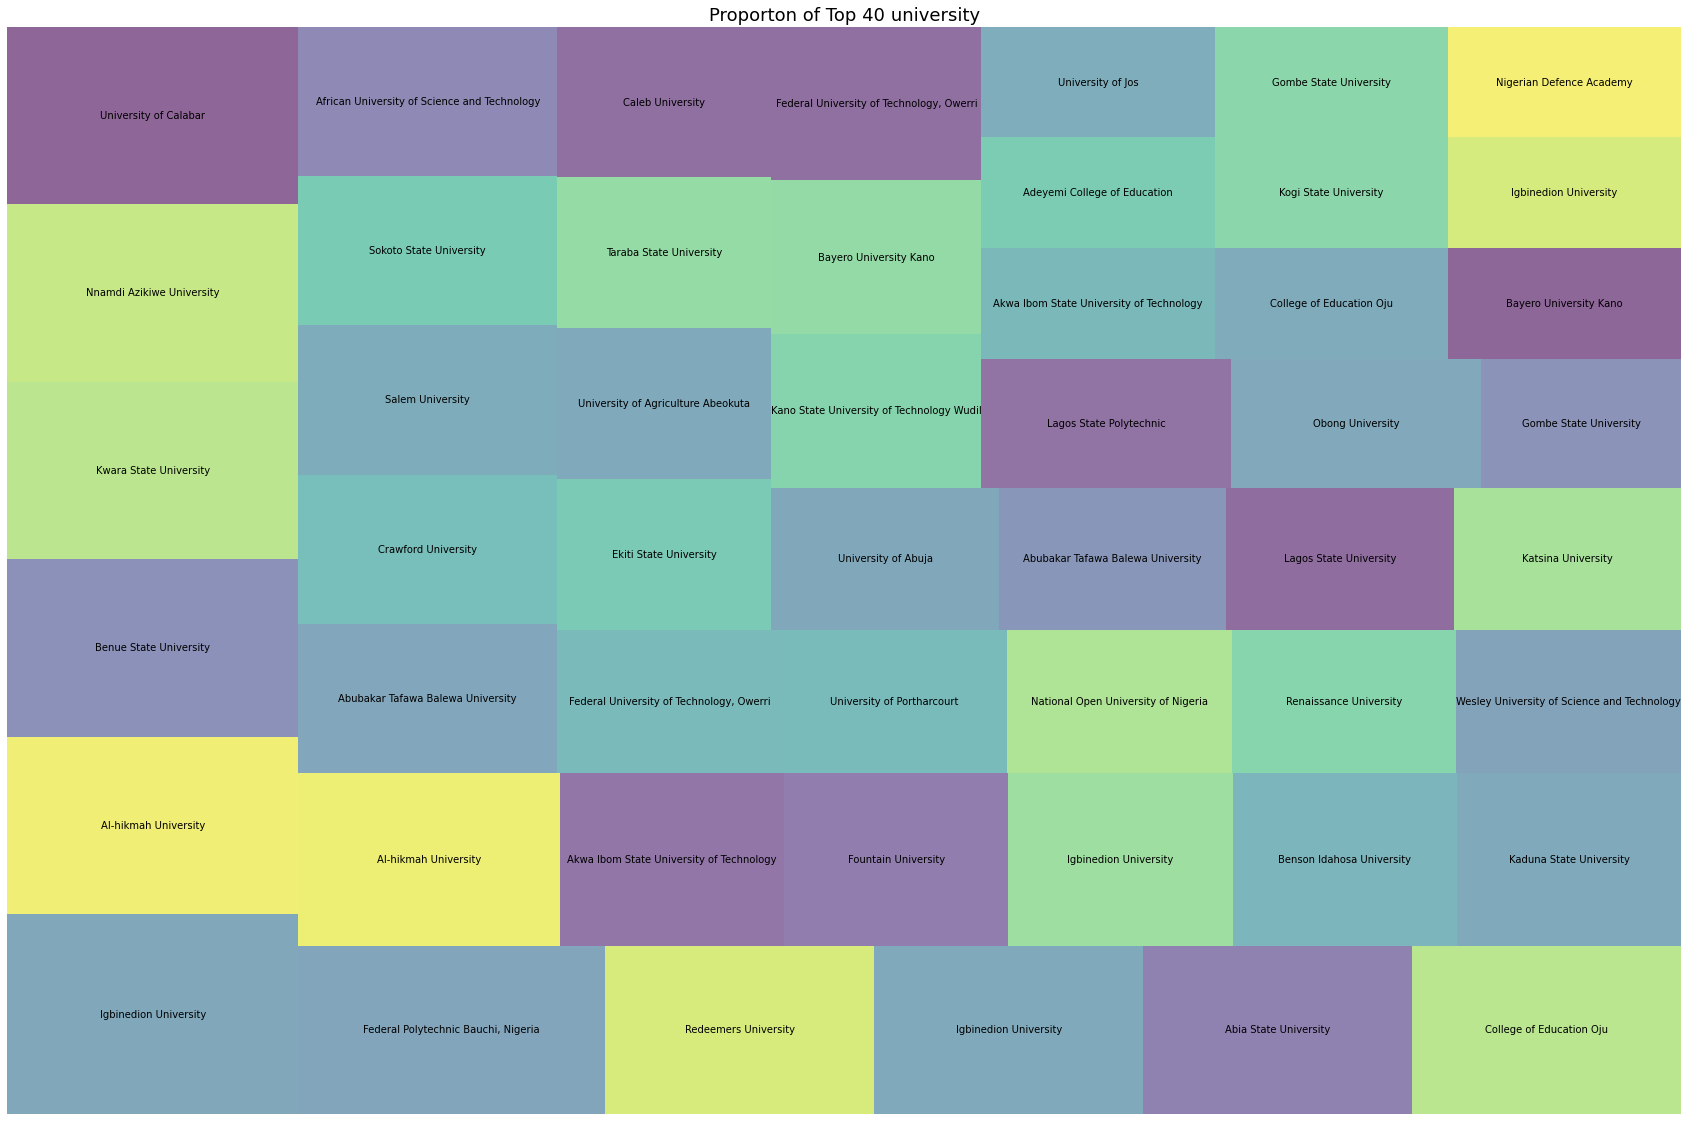

In [37]:
#Visualizing the top universities in Nigeria
plt.figure(figsize=(30, 20))
sizes = Nigeria['university'].value_counts()[:50]
squarify.plot(sizes=sizes, label=Nigeria['university'], alpha=0.6)
plt.title('Proporton of Top 40 university', fontsize=18)
plt.axis('off')
plt.show()

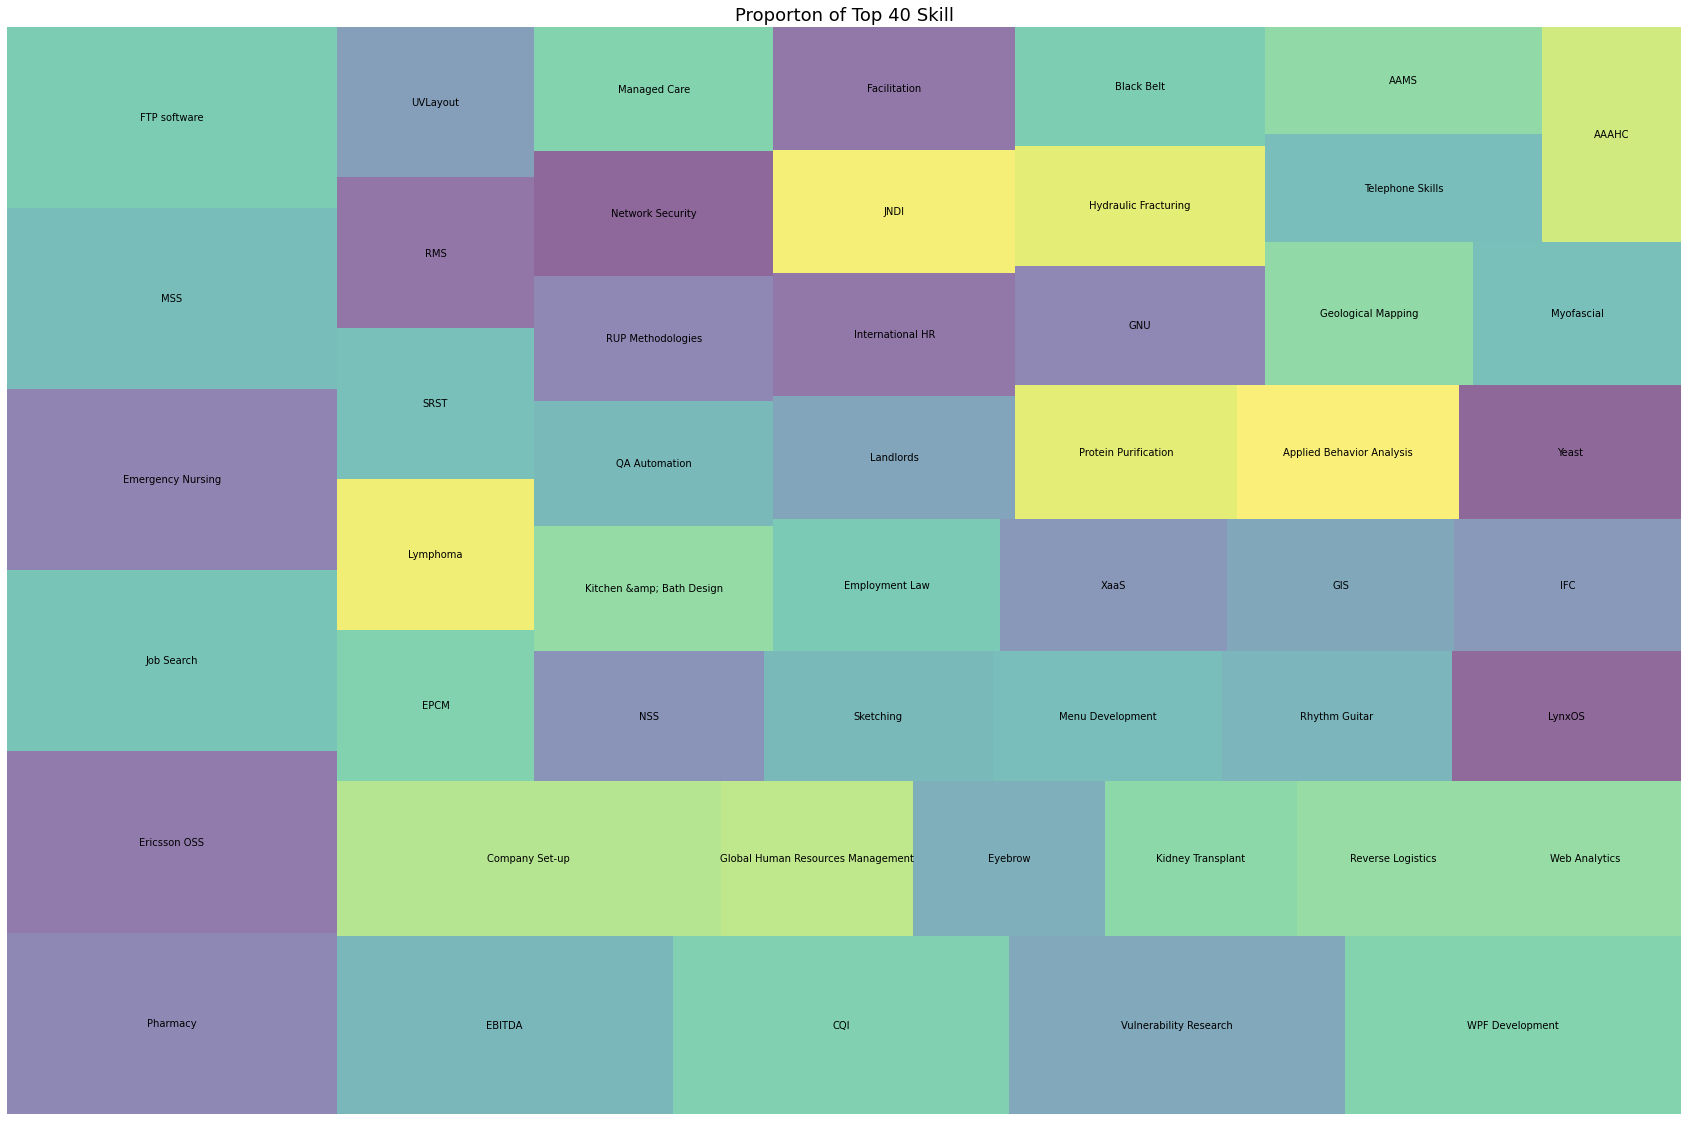

In [38]:
plt.figure(figsize=(30, 20))
sizes = Nigeria['linkedin_skill'].value_counts()[:50]
squarify.plot(sizes=sizes, label=Nigeria['linkedin_skill'], alpha=0.6)
plt.title('Proporton of Top 40 Skill', fontsize=18)
plt.axis('off')
plt.show()

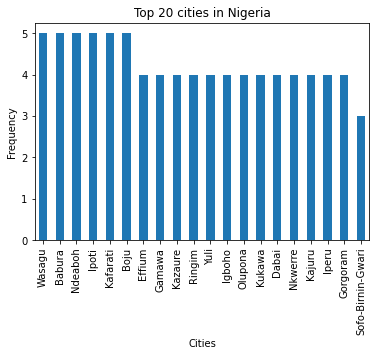

In [39]:
#visualizing the cities in Nigeria datset
Nigeria_city_value= Nigeria["city"].value_counts()
Nigeria_city_value.head(20).plot(kind="bar"),
plt.xlabel("Cities"),
plt.ylabel("Frequency"),
plt.title("Top 20 cities in Nigeria");